In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [12]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [13]:
# drop the column 
data = data.drop(["Unnamed: 0"],axis=1)
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [14]:
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [16]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [17]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [18]:
# hence there might be skewness and outliers present as we show in the describe that there is high variance 

In [19]:
# in the column  radio there are some zeroes are present so first treat them 

In [20]:
data['radio'] = data['radio'].replace(0,data['radio'] .mean())

In [21]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.048983,0.056648,0.782224
radio,0.048983,1.000000,0.348551,0.571898
newspaper,0.056648,0.348551,1.000000,0.228299
sales,0.782224,0.571898,0.228299,1.000000


<AxesSubplot:>

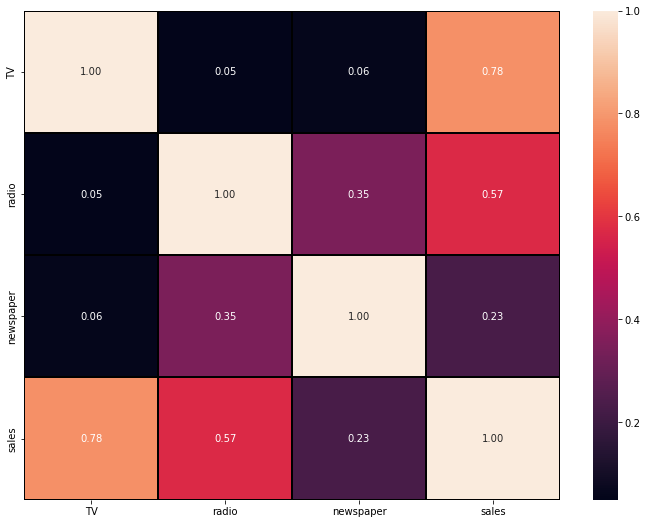

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(),annot= True,linewidth=0.1,linecolor='black',fmt="0.2f")

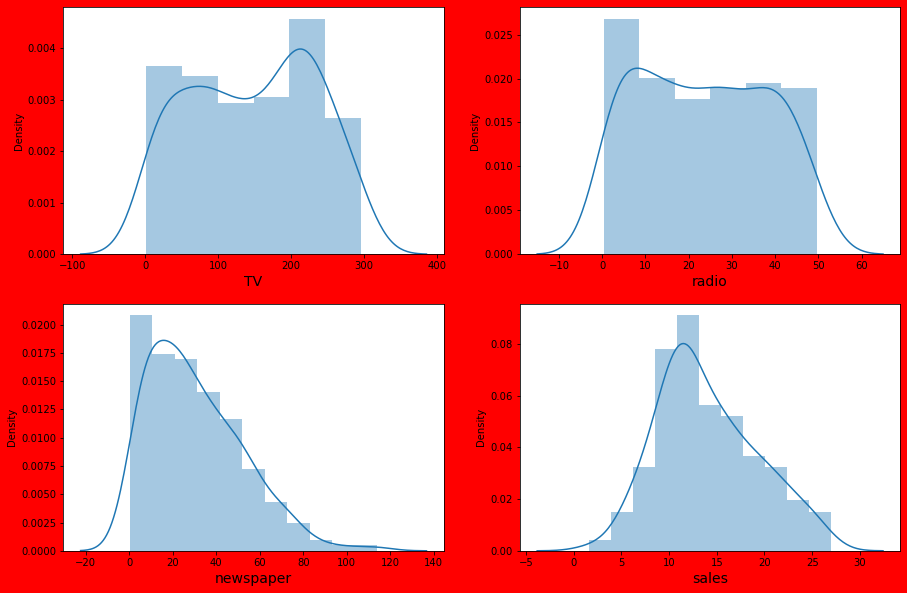

In [23]:
plt.figure(figsize = (15,10),facecolor = "red")
plotnumber = 1
for column in data:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=14)
        
    plotnumber+=1
plt.show()

In [24]:
df_features = data.drop('sales',axis=1)

In [89]:
data.skew()

TV          -0.082332
radio        0.112591
newspaper    0.650112
sales        0.407130
dtype: float64

In [91]:
from sklearn.preprocessing import power_transform
x= power_transform(x,method='yeo-johnson')
x

array([[ 9.55983058e-01,  9.68421234e-01,  1.60419650e+00],
       [-1.19200349e+00,  1.04658008e+00,  8.31044006e-01],
       [-1.64612530e+00,  1.37782855e+00,  1.60705249e+00],
       [ 1.42934281e-01,  1.14905167e+00,  1.28376774e+00],
       [ 4.56452411e-01, -7.54643734e-01,  1.28062154e+00],
       [-1.82040080e+00,  1.52233283e+00,  1.76610727e+00],
       [-1.00349358e+00,  6.98938753e-01, -1.02053455e-01],
       [-2.09960489e-01, -1.01103002e-01, -8.49688954e-01],
       [-1.82264543e+00, -1.65432900e+00, -2.09866461e+00],
       [ 6.52694004e-01, -1.58616573e+00, -2.26499330e-01],
       [-8.84827613e-01, -1.21549249e+00, -6.55338235e-02],
       [ 8.03220284e-01,  1.83240419e-01, -1.59608414e+00],
       [-1.52567125e+00,  8.24702137e-01,  1.50859232e+00],
       [-4.80903084e-01, -1.03790158e+00, -1.23269654e+00],
       [ 6.96423742e-01,  7.04474706e-01,  8.63674550e-01],
       [ 6.07694561e-01,  1.46494855e+00,  1.10260830e+00],
       [ 1.44702338e+00,  1.06207500e+00

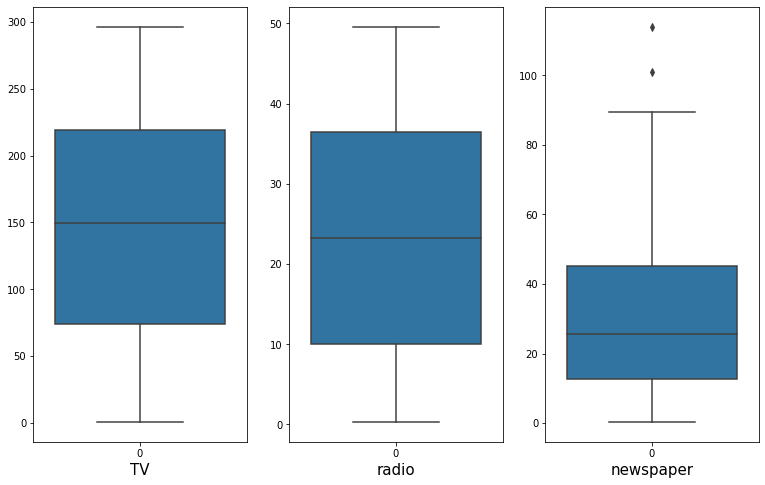

In [92]:
plt.figure(figsize = (13,8))
plotnumber = 1
for column in df_features:
    if plotnumber<=3:
        plt.subplot(1,3,plotnumber)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

In [93]:
data.shape

(198, 4)

In [94]:
from scipy.stats import zscore

In [95]:
z_score = zscore(data[['TV','radio','newspaper']])
abs_z_score = np.abs(z_score)
threshold=3
np.where(abs_z_score>3)

(array([], dtype=int64), array([], dtype=int64))

In [96]:
fil_entry = (abs_z_score<3).all(axis=1)
data = data[fil_entry]
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


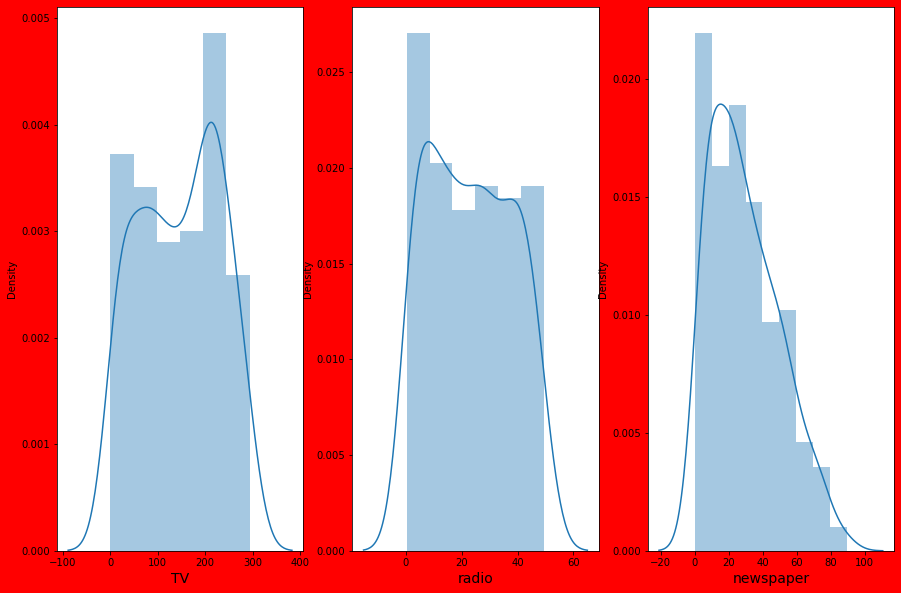

In [97]:
plt.figure(figsize = (15,10),facecolor = "red")
plotnumber = 1
for column in data:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=14)
        
    plotnumber+=1
plt.show()

In [98]:
# data looks good now we scaled the data

In [99]:
# seprating the columns into features and target
x= data.drop("sales",axis=1)
y= data["sales"]

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled= sc.fit_transform(x)

In [102]:
x_scaled.shape[1]

3

In [103]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["features"] = x.columns

vif


,vif,features
0,1.003449,TV
1,1.132216,radio
2,1.132617,newspaper


In [104]:
# as the vif values is less it mns there is no multicollinearity

In [105]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [106]:
for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print("At random state",i , "the training accuracy is",  {r2_score(y_train,pred_train)})
    
    print("At random state",i , "the testing accuracy is" , {r2_score(y_test,pred_test)})
    print("\n")

At random state 0 the training accuracy is {0.8816401339267929}
At random state 0 the testing accuracy is {0.9154813070637495}


At random state 1 the training accuracy is {0.8916966321257536}
At random state 1 the testing accuracy is {0.900714171048392}


At random state 2 the training accuracy is {0.914062166521022}
At random state 2 the testing accuracy is {0.8426918747158998}


At random state 3 the training accuracy is {0.8858417749926291}
At random state 3 the testing accuracy is {0.9152474245280903}


At random state 4 the training accuracy is {0.9004366510685178}
At random state 4 the testing accuracy is {0.8631584727054067}


At random state 5 the training accuracy is {0.8999279843567308}
At random state 5 the testing accuracy is {0.8675415683261554}


At random state 6 the training accuracy is {0.8939592181936474}
At random state 6 the testing accuracy is {0.893653586929126}


At random state 7 the training accuracy is {0.8913212594482884}
At random state 7 the testing accura

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [108]:
lr.fit(x_train,y_train)

LinearRegression()

In [109]:
pred_test = lr.predict(x_test)

In [110]:
print(r2_score(y_test,pred_test))

0.9076995959107258


In [112]:
from sklearn.model_selection import cross_val_score

In [113]:
for j in range(3,10):
    cv_score = cross_val_score(lr,x,y,cv=j)
    cv_mean = cv_score.mean()
    print("The accuracy of the model is ",cv_score.mean(),"at CV is", j)
    
     

The accuracy of the model is  0.8892586315193295 at CV is 3
The accuracy of the model is  0.8876374449575888 at CV is 4
The accuracy of the model is  0.8843099056890475 at CV is 5
The accuracy of the model is  0.8867003266093906 at CV is 6
The accuracy of the model is  0.8833114798051881 at CV is 7
The accuracy of the model is  0.8874455817821159 at CV is 8
The accuracy of the model is  0.8807335866431436 at CV is 9


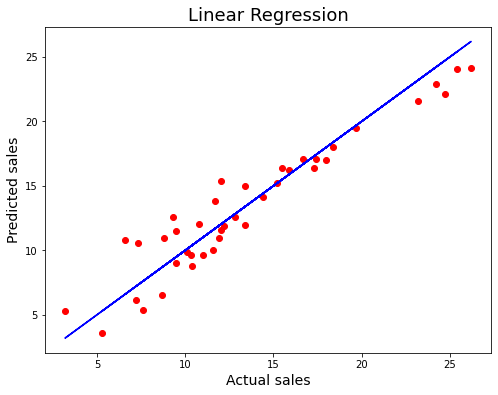

In [114]:
plt.figure(figsize = (8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color = 'b')
plt.xlabel('Actual sales',fontsize=14)
plt.ylabel('Predicted sales',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(2,10))}

ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)



{'alpha': 0.1, 'random_state': 2}


In [117]:
ls = Lasso(alpha=0.1,random_state=2)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)



In [118]:
lss = r2_score(y_test,pred_ls)
lss

0.9077881177691544

In [119]:
cv_score = cross_val_score(ls,x,y,cv=3)
cv_mean = cv_score.mean()
cv_mean

0.8893639235073084

In [120]:
# WITH RANDOM FOREST

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [122]:
parameter = {'criterion':['mse','mae','rmse'],'max_features':["auto","sqrt","log2"],'max_depth':[2,7],'min_samples_leaf':[2,10]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 2}


In [123]:
rf = RandomForestRegressor(criterion="mse",max_features="auto",max_depth=7,min_samples_leaf=2)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_dec = rf.predict(x_test)

In [124]:
rfs = r2_score(y_test,pred_dec)
print('R2 Score:',rfs*100)
rf_score = cross_val_score(rf,x,y,cv=3)
rfc = rf_score.mean()
print("Cross val Score :",rfc*100)

R2 Score: 97.1863877271233
Cross val Score : 96.6873509589344


In [152]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

In [129]:
params = {'n_estimators':[47,50,60,70],'learning_rate':[0.25,0.30,0.40]}

In [130]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor(),cv=3,param_distributions=params)

In [131]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [132]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.4, n_estimators=70)

In [133]:
ada = AdaBoostRegressor(learning_rate=0.4,n_estimators=70)

In [134]:
ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.4, n_estimators=70)

In [135]:
y_pred = ada.predict(x_test)

print(r2_score(y_test,y_pred))

0.9548257612820934


In [149]:
# so as the accuracy is best in the RANDOM FORERST ALGO so we used lr to predict our model

In [146]:
# saving the model for later prediction
import pickle

In [151]:
filename = 'advertise_sales.pickle'
pickle.dump(rf,open(filename,'wb'))

In [148]:
# hence my model is comoleted and ready to predict